In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
import tensorflow as tf

from keras.datasets import fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train,10)
y_test= np_utils.to_categorical(y_test,10)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), padding='same',  filters=32))
model.add(MaxPooling2D(pool_size=(3,3),  padding='same'))

model.add(Conv2D( kernel_size=(3,3), padding='same',  filters=64))
model.add(MaxPooling2D(pool_size=(3,3),  padding='same'))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.1))
model.summary()

from tensorflow.keras.optimizers import SGD
opt=SGD()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = 128, epochs=50,validation_data=(x_test, y_test), verbose=1)

test_loss,test_acc=model.evaluate(x_test, y_test)
print("test accuracy: ",test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 256)              

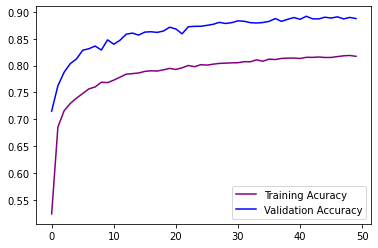

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'purple',label = 'Training Acuracy')
plt.plot(val_acc,color = 'blue',label = 'Validation Accuracy')
plt.legend()

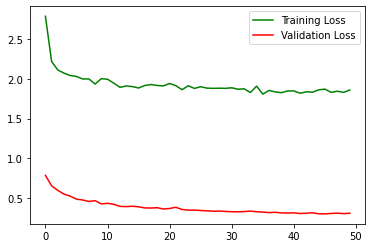

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [ ]:
#lưu lại mô hình 
model.save('CNN_Mnist_final.h5')
# lấy lại mô hình 
from keras import models
model500=models.load_model('CNN_Mnist_final.h5')